In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
pres_polls = pd.read_csv('../Data/president_polls.csv')
primary_polls = pd.read_csv('../Data/president_primary_polls.csv')
az = pd.read_csv('..//Data//2016_az.csv')
oh = pd.read_csv('..//Data//2016_ohio.csv')
fl = pd.read_csv('..//Data//2016_fl.csv')
ill = pd.read_csv('..//Data//2016_Ill.csv')
az_demog = pd.read_csv('..//Data//az_demogr.csv')
oh_demog = pd.read_csv('..//Data//ohio_demogr.csv')
fl_demog = pd.read_csv('..//Data//fl_demogr.csv')
ill_demog = pd.read_csv('..//Data/illi_demogr.csv')

In [69]:
pres_polls.head()

,question_id,poll_id,cycle,state,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,fte_grade,sample_size,population,population_full,methodology,office_type,seat_number,seat_name,start_date,end_date,election_date,sponsor_candidate,internal,partisan,tracking,nationwide_batch,ranked_choice_reallocated,created_at,notes,url,stage,answer,candidate_name,candidate_party,pct
0,119842,64774,2020,Michigan,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,NaN,1100.0,rv,rv,Online,U.S. President,0,NaN,2020-03-07,2020-03-09,NaN,NaN,False,NaN,NaN,False,False,3/9/20 22:41,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Sanders,Bernard Sanders,DEM,45.5
1,119842,64774,2020,Michigan,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,NaN,1100.0,rv,rv,Online,U.S. President,0,NaN,2020-03-07,2020-03-09,NaN,NaN,False,NaN,NaN,False,False,3/9/20 22:41,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,43.4
2,119843,64774,2020,Michigan,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,NaN,1100.0,rv,rv,Online,U.S. President,0,NaN,2020-03-07,2020-03-09,NaN,NaN,False,NaN,NaN,False,False,3/9/20 22:41,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Biden,Joseph R. Biden Jr.,DEM,44.1
3,119843,64774,2020,Michigan,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,NaN,1100.0,rv,rv,Online,U.S. President,0,NaN,2020-03-07,2020-03-09,NaN,NaN,False,NaN,NaN,False,False,3/9/20 22:41,NaN,https://projects.fivethirtyeight.com/polls/202...,general,Trump,Donald Trump,REP,45.5
4,119814,64766,2020,Michigan,568,YouGov,1213,Yahoo News,YouGov,391,YouGov,B-,566.0,rv,rv,Online,U.S. President,0,NaN,2020-03-06,2020-03-08,NaN,NaN,False,NaN,NaN,False,False,3/9/20 14:12,NaN,https://docs.cdn.yougov.com/fwvdnnbigm/2020030...,general,Biden,Joseph R. Biden Jr.,DEM,45.0


# Presidential Data EDA 

In [3]:
candidates = ['Biden', 'Sanders', 'Trump']
pres_polls = pres_polls[pres_polls.answer.isin(candidates)]
pres_polls['answer'].value_counts()

Trump      1837
Biden       402
Sanders     375
Name: answer, dtype: int64

In [4]:
pres_polls.stage.value_counts()

general    2614
Name: stage, dtype: int64

In [5]:
#Switch all date columns to date time columns. 
pres_polls['start_date'] = pres_polls['start_date'].astype('datetime64[ns]')
pres_polls['end_date'] = pres_polls['end_date'].astype('datetime64[ns]')

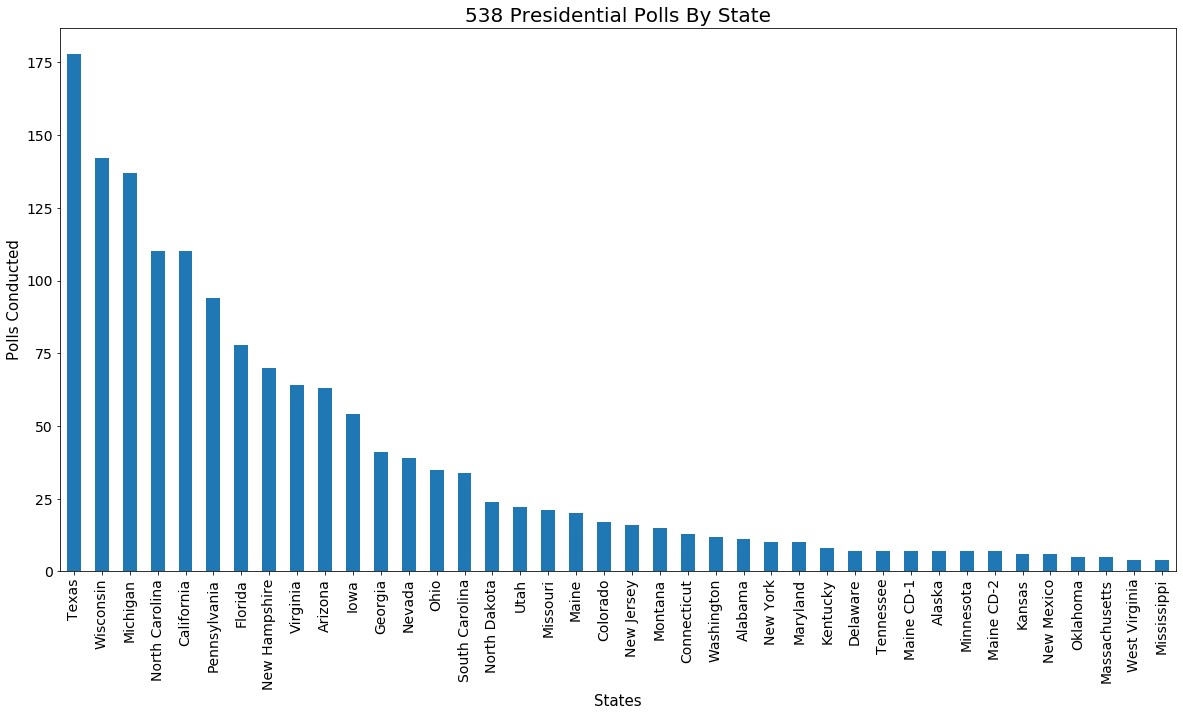

In [6]:
polling_frequency = pres_polls['state'].value_counts()
polling_frequency.plot.bar(figsize = (20,10))
plt.xlabel('States', fontsize=15)
plt.ylabel('Polls Conducted', fontsize=15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('538 Presidential Polls By State', fontsize=20);
#So up to this point we see a vast seperation in polling between states
#I wouldn't say the correlation of polling to a state being a tossup is one but certainly we expect
#States which we know the presidential outcome, i.e Arkansas, to have a few amount of polls conducted 
#Versus a state like New Hampshire which does have a chance to flip on election night

In [7]:
#Ok let's now look at our democratic candidates seperately
polls_sanders = pres_polls[pres_polls['answer']=='Sanders']
polls_biden = pres_polls[pres_polls['answer']=='Biden']

In [8]:
# I want to show change over time in polling averages for each candidate in a specific state
# The state's will examine are classical "swing" states, Pennsylvania, Ohio, Michigan, Wisconsin, 
# North Carolina, New Hampshire, Iowa and Florida 

#Pennsylvania
biden_pa = polls_biden.loc[polls_biden['state'] == 'Pennsylvania', ['pct', 'start_date']]
biden_pa.set_index(['start_date'], inplace=True)
sanders_pa = polls_sanders.loc[polls_sanders['state']== 'Pennsylvania', ['pct', 'start_date']]
sanders_pa.set_index(['start_date'], inplace=True)

#Ohio
biden_oh = polls_biden.loc[polls_biden['state']=='Ohio', ['pct', 'start_date']]
biden_oh.set_index(['start_date'], inplace=True)
sanders_oh = polls_sanders.loc[polls_sanders['state']== 'Ohio', ['pct', 'start_date']]
sanders_oh.set_index(['start_date'], inplace=True)

#Michigan
biden_mi = polls_biden.loc[polls_biden['state'] == 'Michigan', ['pct', 'start_date']]
biden_mi.set_index(['start_date'], inplace=True)
sanders_mi = polls_sanders.loc[polls_sanders['state']== 'Michigan', ['pct', 'start_date']]
sanders_mi.set_index(['start_date'], inplace=True)

#Wisconsin
biden_wi = polls_biden.loc[polls_biden['state'] == 'Wisconsin', ['pct', 'start_date']]
biden_wi.set_index(['start_date'], inplace=True)
sanders_wi = polls_sanders.loc[polls_sanders['state']== 'Wisconsin', ['pct', 'start_date']]
sanders_wi.set_index(['start_date'], inplace=True)

#North Carolina 
biden_nc = polls_biden.loc[polls_biden['state'] == 'North Carolina', ['pct', 'start_date']]
biden_nc.set_index(['start_date'], inplace=True)
sanders_nc = polls_sanders.loc[polls_sanders['state']== 'North Carolina', ['pct', 'start_date']]
sanders_nc.set_index(['start_date'], inplace=True)

#New Hampshire
biden_nh = polls_biden.loc[polls_biden['state'] == 'New Hampshire', ['pct', 'start_date']]
biden_nh.set_index(['start_date'], inplace=True)
sanders_nh = polls_sanders.loc[polls_sanders['state']== 'New Hampshire', ['pct', 'start_date']]
sanders_nh.set_index(['start_date'], inplace=True)

#Iowa
biden_ia = polls_biden.loc[polls_biden['state'] == 'Iowa', ['pct', 'start_date']]
biden_ia.set_index(['start_date'], inplace=True)
sanders_ia = polls_sanders.loc[polls_sanders['state']== 'Iowa', ['pct', 'start_date']]
sanders_ia.set_index(['start_date'], inplace=True)

#Florida
biden_fl = polls_biden.loc[polls_biden['state'] == 'Florida', ['pct', 'start_date']]
biden_fl.set_index(['start_date'], inplace=True)
sanders_fl = polls_sanders.loc[polls_sanders['state']== 'Florida', ['pct', 'start_date']]
sanders_fl.set_index(['start_date'], inplace=True)

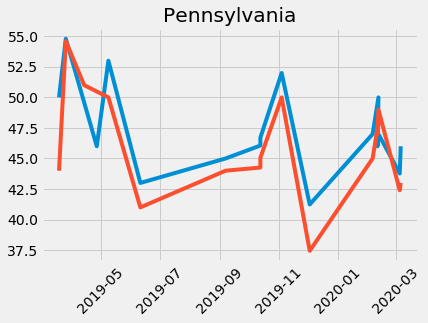

In [68]:
style.use('fivethirtyeight')
plt.title('Pennsylvania')
plt.plot(biden_pa.index.values, biden_pa['pct'], label='Biden')
plt.plot(sanders_pa.index.values, sanders_pa['pct'], label='Sanders')
#plt.legend(label)
plt.xticks(rotation=45)
plt.show()

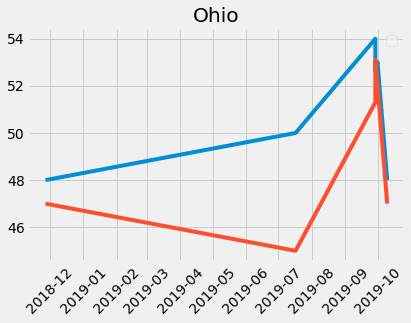

In [41]:
style.use('fivethirtyeight')
plt.title('Ohio')
plt.legend((biden_oh['pct'], sanders_oh['pct']), ('Biden', 'Sanders'))
plt.plot(biden_oh.index.values, biden_oh['pct'])
plt.plot(sanders_oh.index.values, sanders_oh['pct'])
plt.xticks(rotation=45)
plt.show()

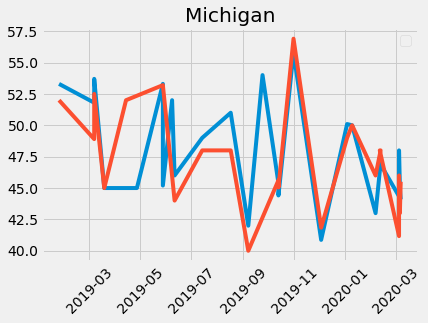

In [42]:
style.use('fivethirtyeight')
plt.title('Michigan')
plt.legend((biden_mi['pct'], sanders_mi['pct']), ('Biden', 'Sanders'))
plt.plot(biden_mi.index.values, biden_mi['pct'])
plt.plot(sanders_mi.index.values, sanders_mi['pct'])
plt.xticks(rotation=45)
plt.show()

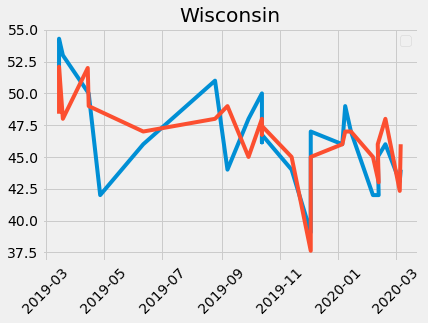

In [43]:
style.use('fivethirtyeight')
plt.title('Wisconsin')
plt.legend((biden_wi['pct'], sanders_wi['pct']), ('Biden', 'Sanders'))
plt.plot(biden_wi.index.values, biden_wi['pct'])
plt.plot(sanders_wi.index.values, sanders_wi['pct'])
plt.xticks(rotation=45)
plt.show()

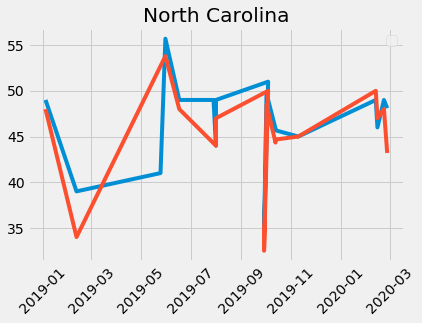

In [44]:
style.use('fivethirtyeight')
plt.title('North Carolina')
plt.legend((biden_nc['pct'], sanders_nc['pct']), ('Biden', 'Sanders'))
plt.plot(biden_nc.index.values, biden_nc['pct'])
plt.plot(sanders_nc.index.values, sanders_nc['pct'])
plt.xticks(rotation=45)
plt.show()

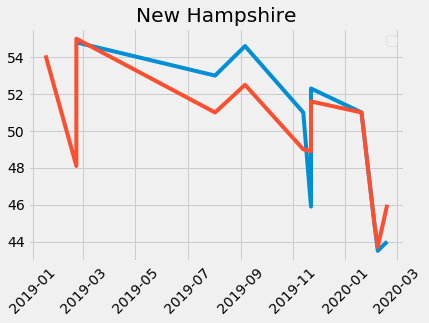

In [45]:
style.use('fivethirtyeight')
plt.title('New Hampshire')
plt.legend((biden_nh['pct'], sanders_nh['pct']), ('Biden', 'Sanders'))
plt.plot(biden_nh.index.values, biden_nh['pct'])
plt.plot(sanders_nh.index.values, sanders_nh['pct'])
plt.xticks(rotation=45)
plt.show()

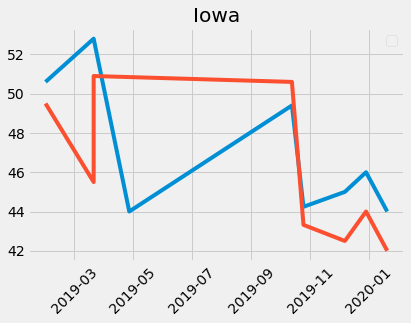

In [46]:
style.use('fivethirtyeight')
plt.title('Iowa')
plt.legend((biden_ia['pct'], sanders_ia['pct']), ('Biden', 'Sanders'))
plt.plot(biden_ia.index.values, biden_ia['pct'])
plt.plot(sanders_ia.index.values, sanders_ia['pct'])
plt.xticks(rotation=45)
plt.show()

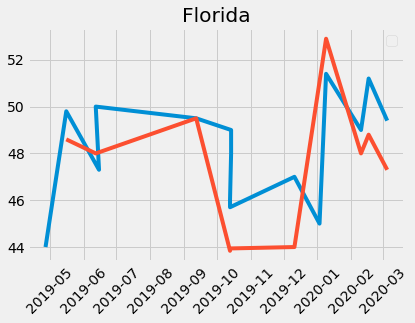

In [39]:
style.use('fivethirtyeight')
plt.title('Florida')
plt.legend((biden_fl['pct'], sanders_fl['pct']), ('Biden', 'Sanders'))
plt.plot(biden_fl.index.values, biden_fl['pct'])
plt.plot(sanders_fl.index.values, sanders_fl['pct'])
plt.xticks(rotation=45)
plt.show()

# Primary Data EDA
**Arizona - Semi Closed Primary**

A previously unaffiliated voter can participate in the primary of his or her choice. A voter who who previously affiliated with a political party can only vote in that party's primary.

In [47]:
rm_comma = lambda x: x.replace(',', '')
az['Clinton Votes'] = az['Clinton Votes'].map(rm_comma).astype(int)
az['Sanders Votes'] = az['Sanders Votes'].map(rm_comma).astype(int)
az.dtypes

County           object
Clinton Votes     int64
Sanders Votes     int64
dtype: object

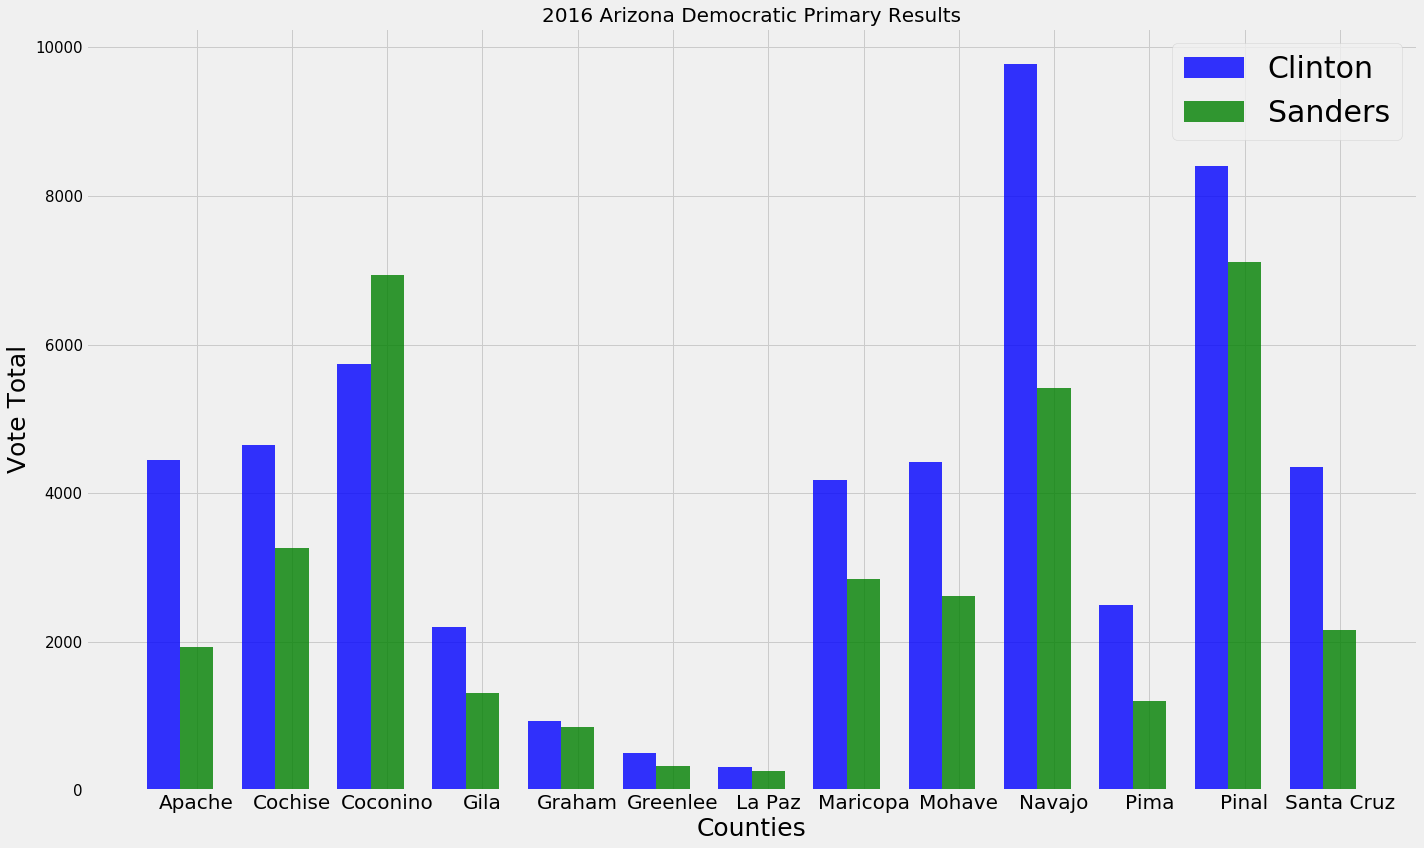

In [48]:
n_groups = 13
votes_clinton = az.drop(labels = [7, 10], axis = 'index')['Clinton Votes']
votes_sanders = az.drop(labels = [7, 10], axis = 'index')['Sanders Votes']

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Arizona Democratic Primary Results', fontsize=20)
plt.xticks(index + bar_width, az['County'], fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [49]:
arz_demog = az_demog[(az_demog.YEAR == 11) & (az_demog.AGEGRP != 0) & (az_demog.AGEGRP != 1) & (az_demog.AGEGRP != 2) 
         & (az_demog.AGEGRP != 3) & (az_demog.AGEGRP != 4)]
arz_demog.reset_index(drop=True, inplace = True)

In [50]:
ariz_demog = arz_demog.drop(columns=['SUMLEV', 'STATE', 'YEAR', 'STNAME'], axis = 1)
ariz_demog.head()

,COUNTY,CTYNAME,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,1,Apache County,5,4695,2345,2350,317,282,6,16,1949,1989,10,9,2,2,61,52,361,324,36,37,1981,2021,21,17,7,4,2200,2226,221,211,4,14,1913,1949,7,5,1,1,54,46,259,247,32,32,1940,1979,17,12,6,3,145,124,96,71,2,2,36,40,3,4,1,1,7,6,102,77,4,5,41,42,4,5,1,1
1,1,Apache County,6,4998,2660,2338,422,324,20,11,2160,1954,25,25,1,0,32,24,443,345,33,21,2183,1970,29,27,5,1,2479,2238,283,263,19,9,2124,1922,25,24,1,0,27,20,299,280,32,18,2144,1935,28,26,4,1,181,100,139,61,1,2,36,32,0,1,0,0,5,4,144,65,1,3,39,35,1,1,1,0
2,1,Apache County,7,4392,2309,2083,523,395,21,14,1725,1641,10,16,0,0,30,17,547,411,31,19,1744,1651,15,18,4,2,2067,1968,332,323,19,10,1687,1604,7,16,0,0,22,15,348,337,25,14,1702,1614,12,17,4,1,242,115,191,72,2,4,38,37,3,0,0,0,8,2,199,74,6,5,42,37,3,1,0,1
3,1,Apache County,8,3964,2080,1884,479,372,18,7,1548,1481,7,8,2,1,26,15,501,386,26,15,1564,1487,14,9,4,3,1891,1778,341,298,15,6,1503,1454,7,8,2,1,23,11,360,308,22,12,1518,1457,13,9,4,3,189,106,138,74,3,1,45,27,0,0,0,0,3,4,141,78,4,3,46,30,1,0,0,0
4,1,Apache County,9,3762,1925,1837,469,349,19,6,1405,1450,7,9,1,1,24,22,490,368,24,13,1423,1466,11,14,2,1,1774,1720,350,272,15,4,1383,1416,6,7,1,1,19,20,366,289,18,10,1399,1430,9,12,2,1,151,117,119,77,4,2,22,34,1,2,0,0,5,2,124,79,6,3,24,36,2,2,0,0


**Florida - Closed Primary State** 

In [51]:
fl = fl[fl['PartyCode']=='DEM']
fl.drop(columns=['PartyCode', 'ElectionDate', 'RaceCode', 'RaceName', 'Precincts', 'PrecinctsReporting',
                'CanNameFirst', 'RaceName'], inplace=True)
fl.reset_index(inplace=True, drop=True)

In [52]:
sa_fl = fl.loc[fl['CanNameLast'] == 'Sanders']
sa_fl.reset_index(drop=True, inplace = True)
cl_fl = fl.loc[fl['CanNameLast'] == 'Clinton']
cl_fl.reset_index(drop=True, inplace=True)

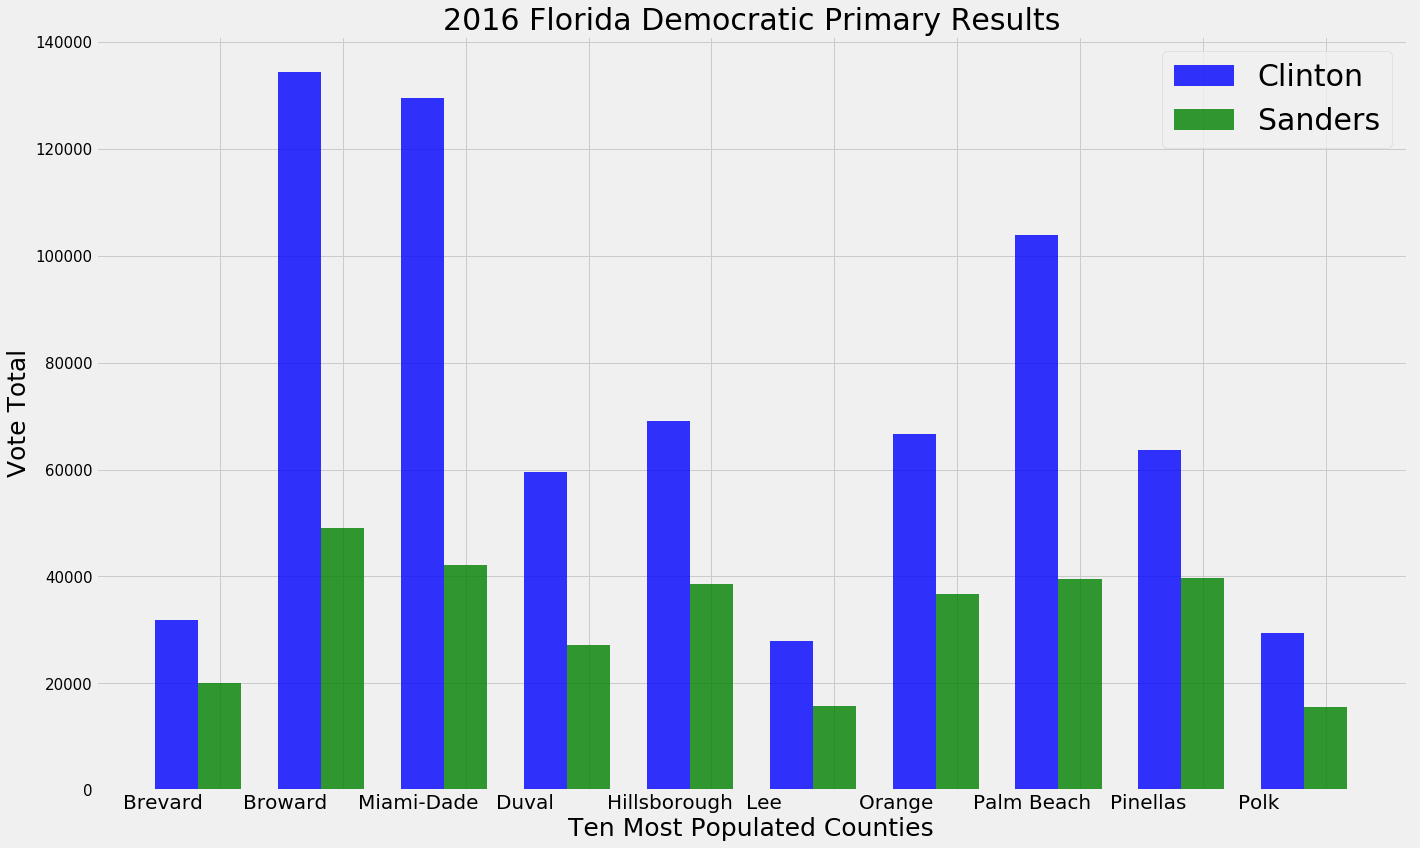

In [53]:
#Ten Most populated counties in Florida
n_groups = 10

fl_votes_clinton = cl_fl.iloc[[4, 5, 12, 15, 28, 35, 47, 49, 51, 52], 4]
fl_votes_sanders = sa_fl.iloc[[4, 5, 12, 15, 28, 35, 47, 49, 51, 52], 4]
fl_ten_high_pop_county = fl.iloc[[4, 5, 12, 15, 28, 35, 47, 49, 51, 52], 2]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, fl_votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, fl_votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Ten Most Populated Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Florida Democratic Primary Results', fontsize=30)
plt.xticks(index + bar_width, fl_ten_high_pop_county, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [54]:
flo_demog = fl_demog[(fl_demog.YEAR == 11) & (fl_demog.AGEGRP != 0) & (fl_demog.AGEGRP != 1) & (fl_demog.AGEGRP != 2) 
         & (fl_demog.AGEGRP != 3) & (fl_demog.AGEGRP != 4)]
flo_demog.reset_index(drop=True, inplace=True)
flo_demog.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,12,1,Florida,Alachua County,11,5,42197,20774,21423,15222,15688,2819,3485,34,47,1891,1507,25,18,783,678,15938,16308,3276,3889,130,140,2222,1778,52,41,18044,18249,12749,12746,2672,3355,25,37,1877,1462,15,17,706,632,13397,13322,3069,3723,100,116,2192,1724,40,38,2730,3174,2473,2942,147,130,9,10,14,45,10,1,77,46,2541,2986,207,166,30,24,30,54,12,3
1,50,12,1,Florida,Alachua County,11,6,24072,12066,12006,8073,7780,2670,2992,58,33,896,859,20,10,349,332,8374,8068,2837,3156,131,101,1067,1022,37,31,10502,10565,6700,6538,2566,2875,32,29,888,844,10,4,306,275,6961,6770,2705,2998,90,77,1053,996,26,24,1564,1441,1373,1242,104,117,26,4,8,15,10,6,43,57,1413,1298,132,158,41,24,14,26,11,7
2,50,12,1,Florida,Alachua County,11,7,18174,9070,9104,6350,6025,1847,2165,43,41,627,659,10,8,193,206,6519,6198,1921,2253,84,84,732,769,23,28,7929,8042,5347,5100,1784,2095,20,30,617,641,6,4,155,172,5480,5244,1833,2154,50,64,717,748,17,20,1141,1062,1003,925,63,70,23,11,10,18,4,4,38,34,1039,954,88,99,34,20,15,21,6,8
3,50,12,1,Florida,Alachua County,11,8,16084,8048,8036,5631,5344,1681,1899,34,36,561,577,8,4,133,176,5744,5491,1729,1967,69,77,635,674,19,24,7083,7060,4770,4474,1624,1850,21,28,551,566,7,1,110,141,4863,4590,1656,1893,48,59,621,660,17,16,965,976,861,870,57,49,13,8,10,11,1,3,23,35,881,901,73,74,21,18,14,14,2,8
4,50,12,1,Florida,Alachua County,11,9,13386,6529,6857,4605,4505,1190,1517,26,22,568,644,7,4,133,165,4715,4642,1242,1579,65,62,640,736,12,19,5745,6107,3919,3843,1140,1478,11,13,563,634,2,4,110,135,4009,3953,1174,1519,44,45,630,721,7,17,784,750,686,662,50,39,15,9,5,10,5,0,23,30,706,689,68,60,21,17,10,15,5,2


**Illinois - Semi Closed Primary State**

In Illinois, a voter states his or her affiliation with a political party at the polling place in order to vote in that party's primary. Because the voter does not have to register partisan affiliation in advance, Illinois' primaries are considered open.

In [55]:
ill = ill.drop(columns=['Clinton','Sanders'])
ill['Clinton Votes'] = ill['Clinton Votes'].map(rm_comma).astype(int)
ill['Sanders Votes'] = ill['Sanders Votes'].map(rm_comma).astype(int)
ill.dtypes

County           object
Clinton Votes     int64
Sanders Votes     int64
dtype: object

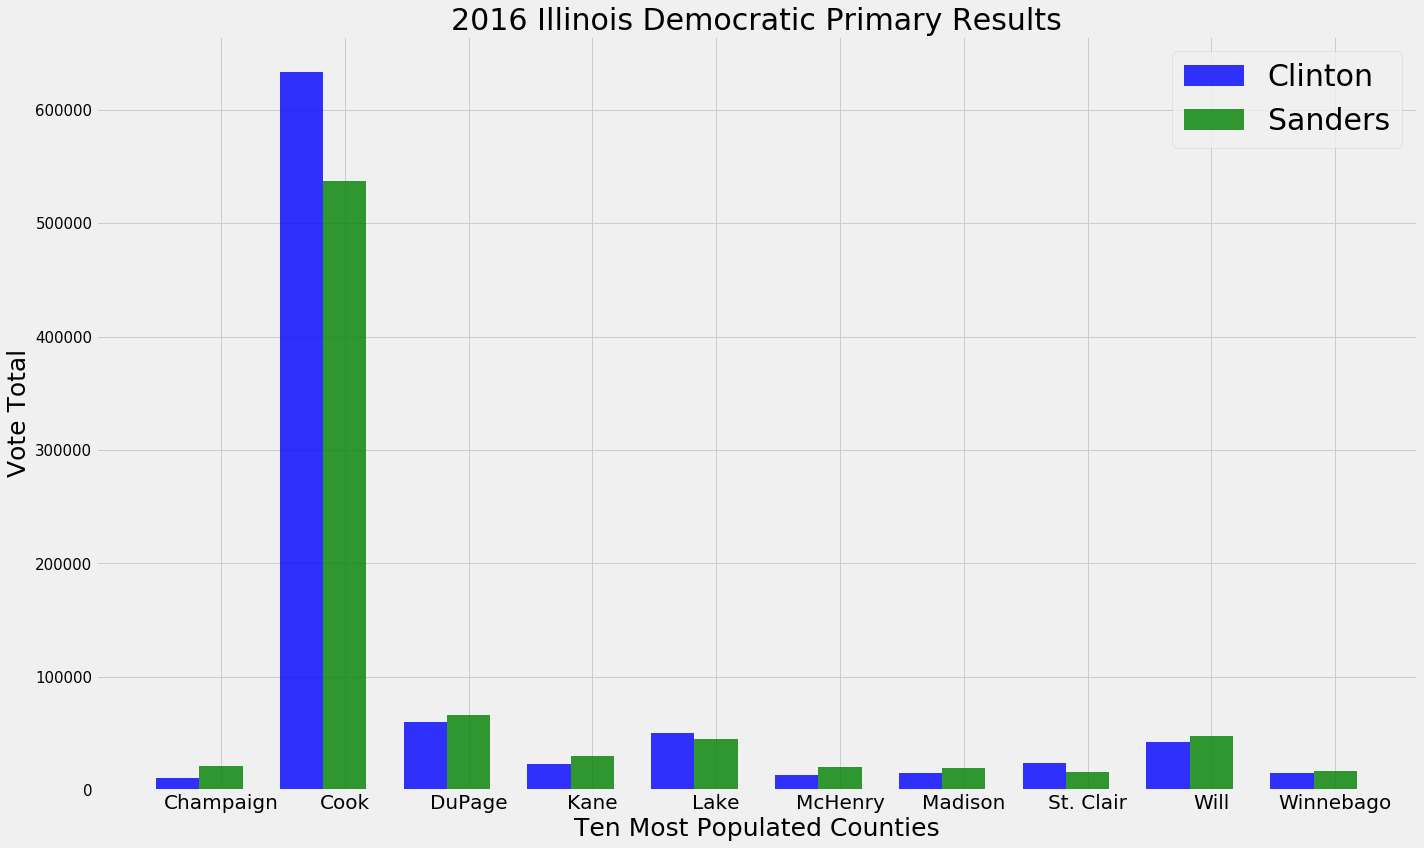

In [56]:
#Ten Most populated counties in Illinois
n_groups = 10

ill_votes_clinton = ill.iloc[[9, 15, 21, 44, 48, 55, 59, 81, 98, 100], 1]
ill_votes_sanders = ill.iloc[[9, 15, 21, 44, 48, 55, 59, 81, 98, 100], 2]
ill_ten_high_pop_county = ill.iloc[[9, 15, 21, 44, 48, 55, 59, 81, 98, 100], 0]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, ill_votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, ill_votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Ten Most Populated Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Illinois Democratic Primary Results', fontsize=30)
plt.xticks(index + bar_width, ill_ten_high_pop_county, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

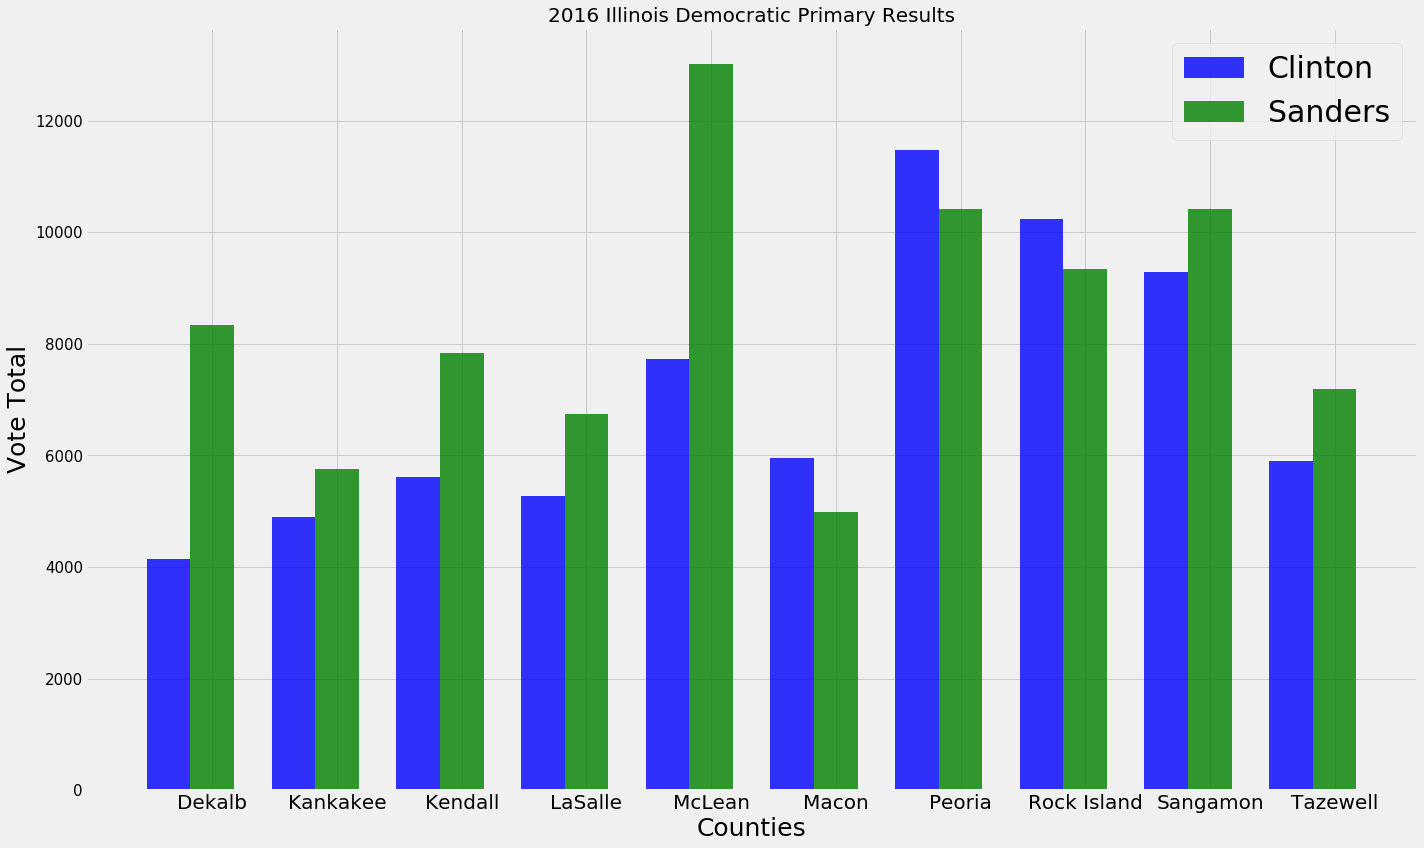

In [57]:
# Eleven through 20 of most populated counties in Illinois
n_groups = 10

ill2_votes_clinton = ill.iloc[[18, 45, 46, 49, 56, 57, 71, 80, 83, 89], 1]
ill2_votes_sanders = ill.iloc[[18, 45, 46, 49, 56, 57, 71, 80, 83, 89], 2]
ill2_ten_high_pop_county = ill.iloc[[18, 45, 46, 49, 56, 57, 71, 80, 83, 89], 0]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, ill2_votes_clinton, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, ill2_votes_sanders, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Illinois Democratic Primary Results', fontsize=20)
plt.xticks(index + bar_width, ill2_ten_high_pop_county, fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [58]:
illi_demog = ill_demog[(ill_demog.YEAR == 11) & (ill_demog.AGEGRP != 0) & (ill_demog.AGEGRP != 1) & (ill_demog.AGEGRP != 2) 
         & (ill_demog.AGEGRP != 3) & (ill_demog.AGEGRP != 4)]
illi_demog.reset_index(drop=True, inplace=True)
ill_demog.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,17,1,Illinois,Adams County,1,0,67103,32667,34436,30654,32469,1205,1152,64,55,213,239,5,7,526,514,31161,32969,1562,1505,198,177,279,309,24,22,32297,34030,30350,32132,1185,1123,53,47,199,234,5,7,505,487,30837,32606,1529,1458,178,155,265,303,23,22,370,406,304,337,20,29,11,8,14,5,0,0,21,27,324,363,33,47,20,22,14,6,1,0
1,50,17,1,Illinois,Adams County,1,1,4232,2146,2086,1864,1845,119,104,6,3,23,20,0,2,134,112,1995,1952,232,196,23,15,35,38,5,5,2102,2050,1829,1815,117,101,5,3,22,20,0,2,129,109,1955,1919,226,192,21,12,34,38,5,5,44,36,35,30,2,3,1,0,1,0,0,0,5,3,40,33,6,4,2,3,1,0,0,0
2,50,17,1,Illinois,Adams County,1,2,4240,2189,2051,1963,1815,112,116,5,4,15,13,0,1,94,102,2055,1917,185,196,19,14,26,30,2,4,2146,1993,1932,1775,109,110,3,1,15,13,0,1,87,93,2017,1868,177,184,15,7,26,29,2,4,43,58,31,40,3,6,2,3,0,0,0,0,7,9,38,49,8,12,4,7,0,1,0,0
3,50,17,1,Illinois,Adams County,1,3,4264,2187,2077,2013,1899,90,105,7,1,11,17,0,0,66,55,2077,1954,140,147,19,5,18,26,3,2,2148,2040,1986,1867,87,103,4,1,8,14,0,0,63,55,2047,1922,136,145,14,5,15,23,3,2,39,37,27,32,3,2,3,0,3,3,0,0,3,0,30,32,4,2,5,0,3,3,0,0
4,50,17,1,Illinois,Adams County,1,4,4620,2375,2245,2190,2056,122,119,1,5,12,8,0,0,50,57,2237,2113,160,161,9,13,20,15,2,1,2339,2199,2162,2015,119,116,1,5,10,8,0,0,47,55,2207,2070,155,156,7,13,18,15,2,1,36,46,28,41,3,3,0,0,2,0,0,0,3,2,30,43,5,5,2,0,2,0,0,0


**Ohio - Open Primary**

Ohio law provides for open primaries, meaning voters do not have to register with a party to participate in its primary. Voters select the ballot of the party whose primary they wish to vote in at the polling place.

In [59]:
oh = oh.drop(columns=['Clinton','Sanders'])
oh['Clinton Votes'] = oh['Clinton Votes'].map(rm_comma).astype(int)
oh['Sanders Votes'] = oh['Sanders Votes'].map(rm_comma).astype(int)
oh.dtypes

County           object
Clinton Votes     int64
Sanders Votes     int64
dtype: object

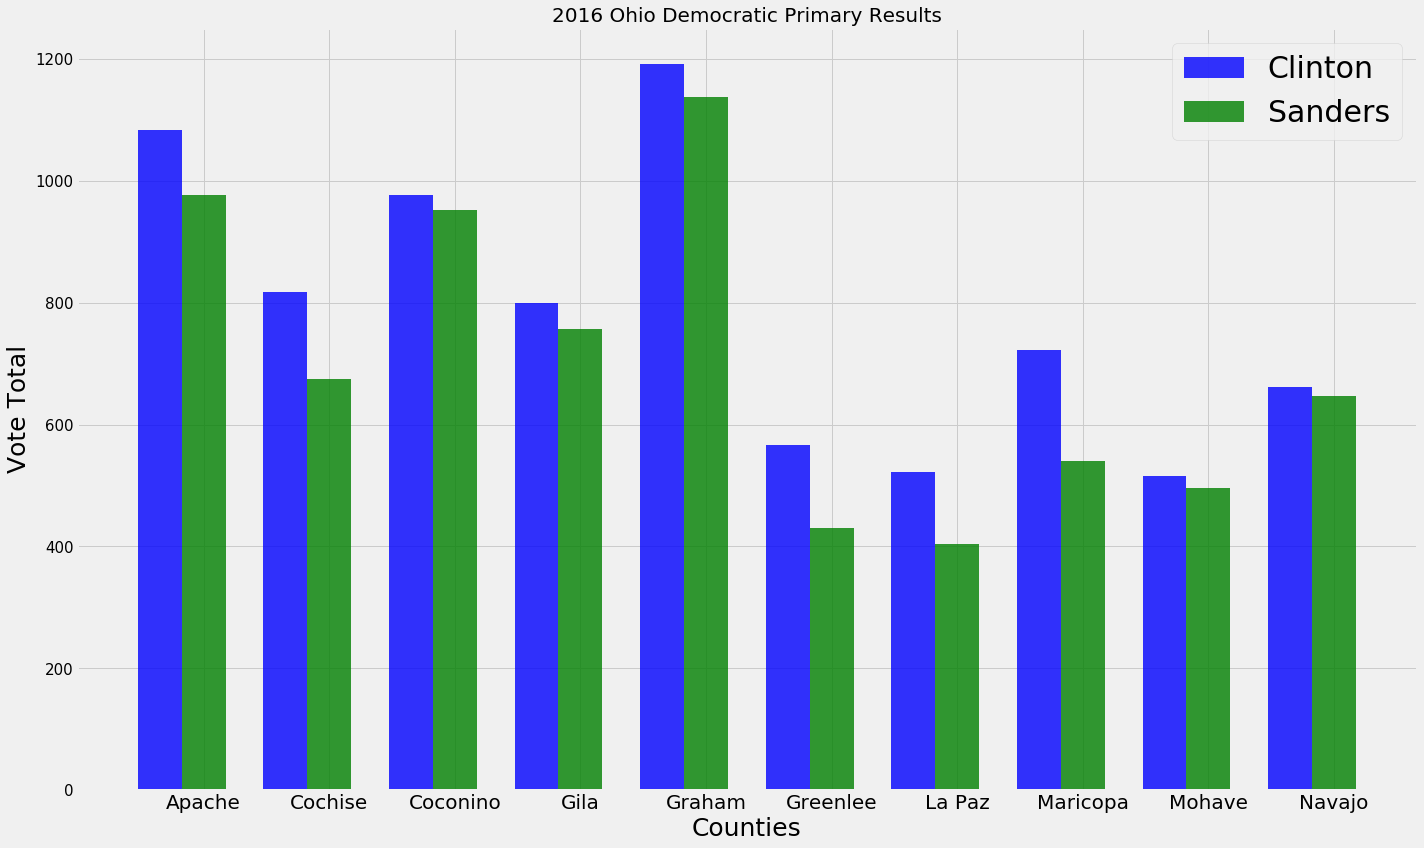

In [60]:
#Ten least populated counties in Ohio 
n_groups = 10

oh_votes_clinton_b10 = oh.iloc[[9, 33, 34, 52, 55, 57, 60, 62, 81, 87], 1]
oh_votes_sanders_b10 = oh.iloc[[9, 33, 34, 52, 55, 57, 60, 62, 81, 87], 2]
ten_low_pop_county = oh.iloc[[9, 33, 34, 52, 55, 57, 60, 62, 81, 87], 0]

# create plot
fig, ax = plt.subplots(figsize=(20,12))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, oh_votes_clinton_b10, bar_width,
                                        alpha=opacity,
                                        color='b',
                                        label='Clinton')

rects2 = plt.bar(index + bar_width, oh_votes_sanders_b10, bar_width,
                                                    alpha=opacity,
                                                    color='g',
                                                    label='Sanders')

plt.xlabel('Counties', fontsize=25)
plt.ylabel('Vote Total', fontsize=25)
plt.title('2016 Ohio Democratic Primary Results', fontsize=20)
plt.xticks(index + bar_width, az['County'], fontsize=20)
plt.yticks(fontsize=15)
plt.legend(fontsize=30)

plt.tight_layout()
plt.show()

In [61]:
ohio_demog = oh_demog[(oh_demog.YEAR == 11) & (oh_demog.AGEGRP != 0) & (oh_demog.AGEGRP != 1) & (oh_demog.AGEGRP != 2) 
         & (oh_demog.AGEGRP != 3) & (oh_demog.AGEGRP != 4)]
ohio_demog.reset_index(drop=True, inplace=True)
ohio_demog.head()

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,WA_MALE,WA_FEMALE,BA_MALE,BA_FEMALE,IA_MALE,IA_FEMALE,AA_MALE,AA_FEMALE,NA_MALE,NA_FEMALE,TOM_MALE,TOM_FEMALE,WAC_MALE,WAC_FEMALE,BAC_MALE,BAC_FEMALE,IAC_MALE,IAC_FEMALE,AAC_MALE,AAC_FEMALE,NAC_MALE,NAC_FEMALE,NH_MALE,NH_FEMALE,NHWA_MALE,NHWA_FEMALE,NHBA_MALE,NHBA_FEMALE,NHIA_MALE,NHIA_FEMALE,NHAA_MALE,NHAA_FEMALE,NHNA_MALE,NHNA_FEMALE,NHTOM_MALE,NHTOM_FEMALE,NHWAC_MALE,NHWAC_FEMALE,NHBAC_MALE,NHBAC_FEMALE,NHIAC_MALE,NHIAC_FEMALE,NHAAC_MALE,NHAAC_FEMALE,NHNAC_MALE,NHNAC_FEMALE,H_MALE,H_FEMALE,HWA_MALE,HWA_FEMALE,HBA_MALE,HBA_FEMALE,HIA_MALE,HIA_FEMALE,HAA_MALE,HAA_FEMALE,HNA_MALE,HNA_FEMALE,HTOM_MALE,HTOM_FEMALE,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,50,39,1,Ohio,Adams County,11,5,1426,709,717,683,698,7,4,5,4,0,2,1,0,13,9,696,706,12,9,11,9,0,2,3,0,697,710,671,692,7,4,5,3,0,2,1,0,13,9,684,700,12,9,11,8,0,2,3,0,12,7,12,6,0,0,0,1,0,0,0,0,0,0,12,6,0,0,0,1,0,0,0,0
1,50,39,1,Ohio,Adams County,11,6,1630,805,825,780,801,7,2,6,4,0,1,0,0,12,17,792,817,9,9,15,14,1,4,0,0,788,809,767,787,7,2,2,3,0,1,0,0,12,16,779,802,9,8,11,13,1,4,0,0,17,16,13,14,0,0,4,1,0,0,0,0,0,1,13,15,0,1,4,1,0,0,0,0
2,50,39,1,Ohio,Adams County,11,7,1434,697,737,676,721,3,3,8,2,2,1,0,0,8,10,684,731,5,6,13,9,3,1,0,0,691,733,670,717,3,3,8,2,2,1,0,0,8,10,678,727,5,6,13,9,3,1,0,0,6,4,6,4,0,0,0,0,0,0,0,0,0,0,6,4,0,0,0,0,0,0,0,0
3,50,39,1,Ohio,Adams County,11,8,1521,744,777,725,762,6,6,2,0,5,2,0,0,6,7,731,769,8,8,6,6,5,3,0,0,733,774,714,760,6,5,2,0,5,2,0,0,6,7,720,767,8,7,6,6,5,3,0,0,11,3,11,2,0,1,0,0,0,0,0,0,0,0,11,2,0,1,0,0,0,0,0,0
4,50,39,1,Ohio,Adams County,11,9,1713,842,871,827,828,2,1,6,3,1,30,0,0,6,9,833,837,3,3,11,9,1,31,0,0,828,863,816,821,2,1,4,3,0,30,0,0,6,8,822,829,3,3,9,9,0,30,0,0,14,8,11,7,0,0,2,0,1,0,0,0,0,1,11,8,0,0,2,0,1,1,0,0
